<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [5]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [6]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [7]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [8]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [9]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [10]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<ipython-input-15-7aebdf12be5d>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedComp'].dropna(), shade=True)


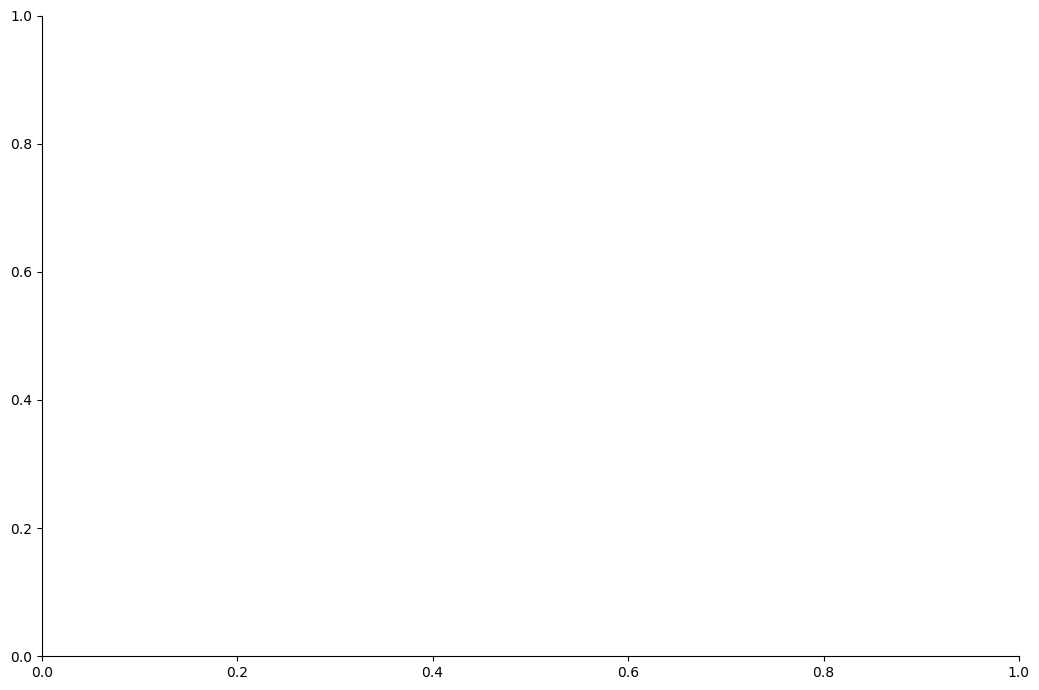

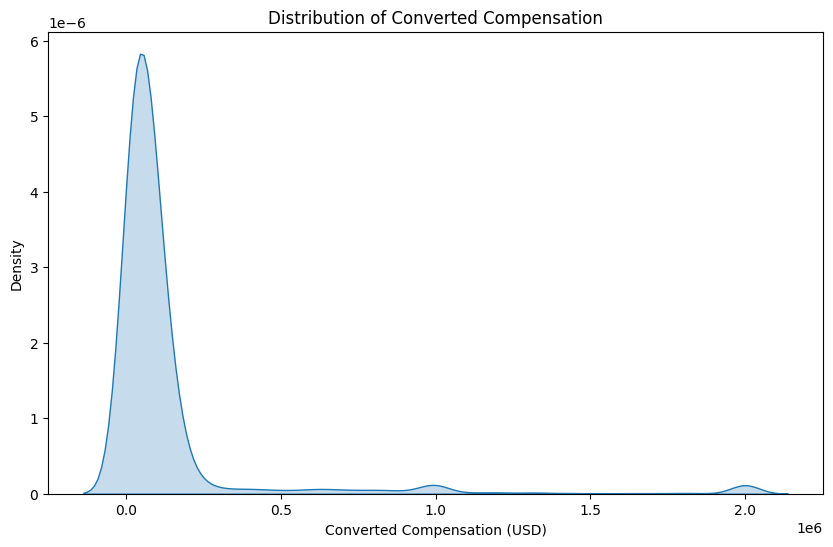

In [15]:
# your code goes here
from matplotlib import pyplot as plt
import piplite
await piplite.install(['seaborn'])
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(df['ConvertedComp'].dropna(), shade=True)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Density')
plt.show()

Plot the histogram for the column `ConvertedComp`.


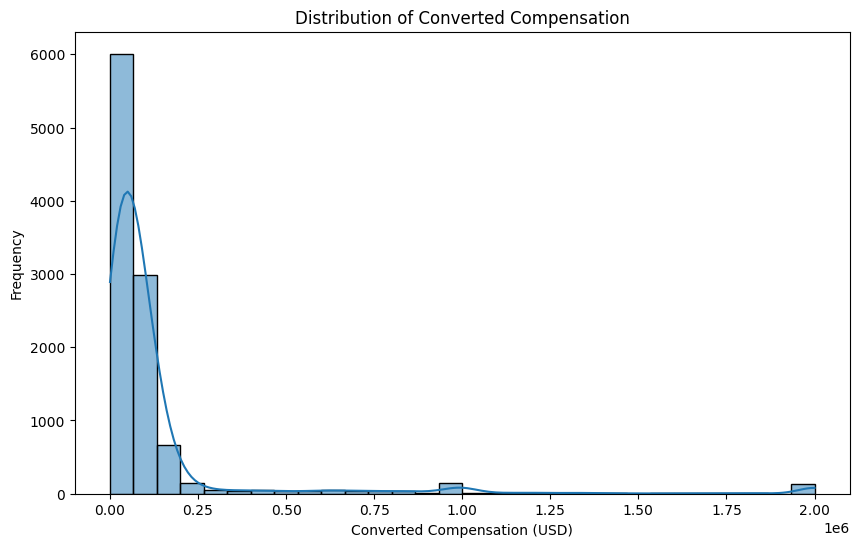

In [16]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.histplot(df['ConvertedComp'].dropna(), kde=True, bins=30)
plt.title('Distribution of Converted Compensation')
plt.xlabel('Converted Compensation (USD)')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [17]:
# your code goes here
median_converted_comp = df['ConvertedComp'].median()
print(median_converted_comp)

57745.0


How many responders identified themselves only as a **Man**?


In [18]:
# your code goes here
number_of_men = df['Gender'].value_counts().get('Man', 0)
print(number_of_men)

10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [20]:
# your code goes here
women_df = df[df['Gender'] == 'Woman']
median_converted_comp_women = women_df['ConvertedComp'].median()
print(median_converted_comp_women)

57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [21]:
# your code goes here
age_summary = df['Age'].describe()
min_age = age_summary['min']
q1_age = age_summary['25%']
median_age = age_summary['50%']
q3_age = age_summary['75%']
max_age = age_summary['max']
print(age_summary)
print(min_age)
print(q1_age)
print(median_age)
print(q3_age)
print(max_age)

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64
16.0
25.0
29.0
35.0
99.0


Plot a histogram of the column `Age`.


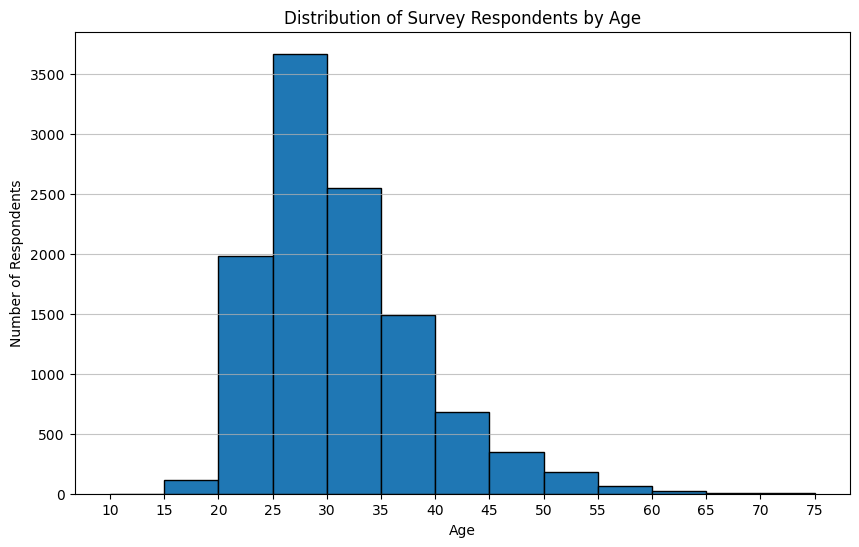

In [34]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(df['Age'].dropna(), bins=range(10, 80, 5), edgecolor='black')
plt.title('Distribution of Survey Respondents by Age')
plt.xlabel('Age')
plt.ylabel('Number of Respondents')
plt.xticks(range(10, 80, 5))
plt.grid(axis='y', alpha=0.75)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


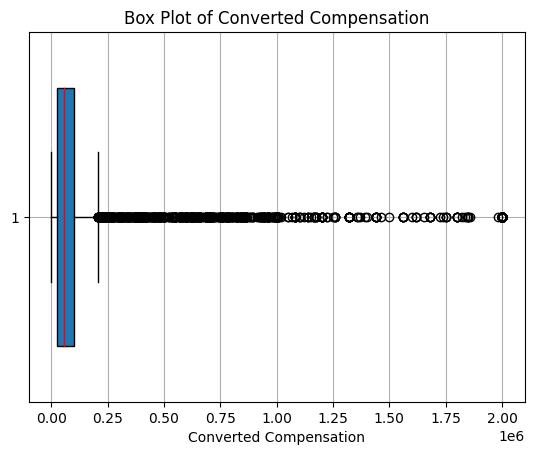

In [36]:
# your code goes here
df = df.dropna(subset=['ConvertedComp'])
plt.boxplot(df['ConvertedComp'], vert=False, widths=0.7, patch_artist=True, medianprops={'color': 'red'})
plt.xlabel('Converted Compensation')
plt.title('Box Plot of Converted Compensation')
plt.grid(True)
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [42]:
# your code goes here
converted_comp = df['ConvertedComp'].dropna()
Q1 = converted_comp.quantile(0.25)
Q3 = converted_comp.quantile(0.75)
Q2 = converted_comp.quantile(0.50)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(Q2)
print(IQR)

26868.0
100000.0
57745.0
73132.0


Find out the upper and lower bounds.


In [46]:
# your code goes here
Q1 = converted_comp.quantile(0.25)
Q3 = converted_comp.quantile(0.75)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound)
print(upper_bound)


-82830.0
209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [31]:
# your code goes here
df1= df[(df['ConvertedComp'] > (Q1 - 1.5 * IQR)) & (df['ConvertedComp'] < (Q3 + 1.5 * IQR))]  
df1['ConvertedComp'].median() 

52704.0

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [40]:
# your code goes here
df['ConvertedComp'] = df['ConvertedComp'].clip(lower=lower_bound, upper=upper_bound)
df_new = df.copy()
print(df_new)

       Respondent                      MainBranch Hobbyist  \
0               4  I am a developer by profession       No   
1               9  I am a developer by profession      Yes   
2              13  I am a developer by profession      Yes   
3              16  I am a developer by profession      Yes   
4              17  I am a developer by profession      Yes   
...           ...                             ...      ...   
11392       25134  I am a developer by profession      Yes   
11393       25136  I am a developer by profession      Yes   
11394       25137  I am a developer by profession      Yes   
11395       25138  I am a developer by profession      Yes   
11396       25141  I am a developer by profession      Yes   

                                             OpenSourcer  \
0                                                  Never   
1                             Once a month or more often   
2      Less than once a month but more than once per ...   
3              

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [33]:
# your code goes here
correlation_matrix = df.corr()
age_correlation = correlation_matrix['Age'].sort_values(ascending=False)
print(age_correlation)

<ipython-input-33-ce72cf522dc5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Age              1.000000
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CompTotal        0.006970
Respondent       0.004041
CodeRevHrs      -0.020469
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
